# **FINAL PROJECT-NEBIYU TADESSE**

# {TRAFFIC ACCIDENT CAUSES AND GENERAL ANALYSIS}



### *What problem are you (or your stakeholder) trying to address? - <a class="anchor" id="Requirements"></a> 
- One of the main problem that I am trying to answer is the cause for most of the traffic accidents and the cause so as to educate people that drive, inturn make roads safer. Laying out the most commin causes can be beneficial to drivers as they will avoid certain scenarios that would otherwise be dangerous for them. 

  


 ## Data Source
- Data: **NHTSA for the State of Tennesse, Mississippi, Alabama, and Georgia**
**US Accidents (2016 - 2021)**
**Introduction to Traffic Crash Analysis**

https://www.nhtsa.gov/traffic-records/state-data-information-resources
https://doc.arcgis.com/en/arcgis-solutions/11.0/reference/introduction-to-traffic-crash-analysis.htm#:~:text=Traffic%20Crash%20Analysis%20can%20be,serious%20and%20fatal%20crashes%20occur.

https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents
## What Questions am I Trying To Answer? <a class="anchor" id="QA"></a>
 - How many people are involved in accidents?
 - Are there more accidents in cloudy or raining areas?
 - Which states have the highest number of accidents?
 - Among the top 100 cities in number of accidents, which states do they belong to most frequently?
 - What time of the day are accidents most frequent in?
 - Which days of the week have the most accidents?
 - Are more accidents prevalent when people get drunk?







**What would an answer look like? As well as the benefits of answering those questions.**
- MORE PEOPLE CAUSE ACCIDENTS WHEN THEY ARE INTOXICATED. 
- RAINY CONDITIONS OR BAD WEATHER ARE FACTORS IN CAR ACCIDENT FATALITY. 
- SOME OF THE BENEFITS OF ANSWERING TOSE QUESTIONS WOULD BE:
- PREVENTION AND AVOIDANCE OF FUTURE ACCIDENTS
- FASTER RESPONSE TIME TO ACCIDENTS
- ESTIMATE HOW MANY ACCIDENTS HAPPEN DUE TO ALCOHOL 
- IMPROVE THE ARRIVAL TIME OF HOSPITAL


- **LAYOUT OF MY BASIC PLAN FOR THIS ANALYSIS**
-  Understanding data
    
- Identifying the problems that I want to solve and metrics that I want to figure out.
- Data preparaion
- Visualizations
- Evaluation
- Deployment
- Classification Analysis
- Cluster Analysis 




## IMPORTING NECESSARY LIBRARIES.  <a class="anchor" id="Datareport"></a>
  

In [ ]:
# Import Libraries Required
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import folium
from folium.plugins import HeatMap
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

##  Describe Data <a class="anchor" id="Describedata"></a>
Data description report - I loaded the data and decribed the data to see what I will be working with. 

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving accident.csv to accident.csv
User uploaded file "accident.csv" with length 23764896 bytes


In [ ]:
accident_data = pd.read_csv('accident.csv',encoding_errors='ignore')


<ipython-input-3-9cbc21b463a0>:1: DtypeWarning: Columns (40,42) have mixed types. Specify dtype option on import or set low_memory=False.
  accident_data = pd.read_csv('accident.csv',encoding_errors='ignore')


In [ ]:
df_region = accident_data.loc[(accident_data['STATENAME'] == "Tennesse")|
                       (accident_data['STATENAME'] == "Mississippi")|
                       (accident_data['STATENAME'] ==  "Alabama")|
                       (accident_data['STATENAME'] == "Georgia")]
df_region.head()

,STATE,STATENAME,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERSONS,PERMVIT,PERNOTMVIT,...,HOSP_MN,HOSP_MNNAME,CF1,CF1NAME,CF2,CF2NAME,CF3,CF3NAME,FATALS,DRUNK_DR
0,1,Alabama,10001,2,2,0,0,3,3,0,...,27,27,0,None,0,None,0,None,1,1
1,1,Alabama,10002,2,2,0,0,2,2,0,...,99,Unknown EMS Hospital Arrival Time,0,None,0,None,0,None,1,0
2,1,Alabama,10003,3,3,0,0,4,4,0,...,5,5,14,"Motor Vehicle struck by falling cargo,or somet...",0,None,0,None,1,0
3,1,Alabama,10004,1,1,0,1,1,1,1,...,88,Not Applicable (Not Transported),0,None,0,None,0,None,1,0
4,1,Alabama,10005,1,1,0,0,1,1,0,...,88,Not Applicable (Not Transported),0,None,0,None,0,None,1,1


**I pulled out the raw data of 4 assingned states Tennesse, Mississippi, Alabama, and Georgia. Then, I started to transform and explore the data.**

In [ ]:
df_region.shape

(2814, 91)

**There are totally 2814 accident cases happened in the 4 states in 2019.**

In [ ]:
df_region.columns

Index(['STATE', 'STATENAME', 'ST_CASE', 'VE_TOTAL', 'VE_FORMS', 'PVH_INVL',
       'PEDS', 'PERSONS', 'PERMVIT', 'PERNOTMVIT', 'COUNTY', 'COUNTYNAME',
       'CITY', 'CITYNAME', 'DAY', 'DAYNAME', 'MONTH', 'MONTHNAME', 'YEAR',
       'DAY_WEEK', 'DAY_WEEKNAME', 'HOUR', 'HOURNAME', 'MINUTE', 'MINUTENAME',
       'NHS', 'NHSNAME', 'ROUTE', 'ROUTENAME', 'TWAY_ID', 'TWAY_ID2',
       'RUR_URB', 'RUR_URBNAME', 'FUNC_SYS', 'FUNC_SYSNAME', 'RD_OWNER',
       'RD_OWNERNAME', 'MILEPT', 'MILEPTNAME', 'LATITUDE', 'LATITUDENAME',
       'LONGITUD', 'LONGITUDNAME', 'SP_JUR', 'SP_JURNAME', 'HARM_EV',
       'HARM_EVNAME', 'MAN_COLL', 'MAN_COLLNAME', 'RELJCT1', 'RELJCT1NAME',
       'RELJCT2', 'RELJCT2NAME', 'TYP_INT', 'TYP_INTNAME', 'WRK_ZONE',
       'WRK_ZONENAME', 'REL_ROAD', 'REL_ROADNAME', 'LGT_COND', 'LGT_CONDNAME',
       'WEATHER1', 'WEATHER1NAME', 'WEATHER2', 'WEATHER2NAME', 'WEATHER',
       'WEATHERNAME', 'SCH_BUS', 'SCH_BUSNAME', 'RAIL', 'RAILNAME', 'NOT_HOUR',
       'NOT_HOURNAME', 'NOT

In [ ]:
df_region.describe()

,STATE,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERSONS,PERMVIT,PERNOTMVIT,COUNTY,...,NOT_MIN,ARR_HOUR,ARR_MIN,HOSP_HR,HOSP_MN,CF1,CF2,CF3,FATALS,DRUNK_DR
count,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000,...,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000
mean,12.441365,124947.796020,1.575338,1.549751,0.025586,0.174129,2.232409,2.227079,0.179460,104.253021,...,54.809168,43.016347,53.857498,67.984009,73.041578,1.023810,0.190476,0.075693,1.088842,0.209311
std,9.481507,94777.227289,0.749814,0.727924,0.208389,0.404681,1.616218,1.617085,0.413242,69.984981,...,36.675897,41.217937,35.520155,37.122726,31.024904,4.980567,3.046383,2.653793,0.382607,0.420636
min,1.000000,10001.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,10712.250000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,57.000000,...,23.000000,12.000000,23.000000,19.000000,48.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,13.000000,130556.500000,1.000000,1.000000,0.000000,0.000000,2.000000,2.000000,0.000000,91.000000,...,45.000000,19.000000,46.000000,88.000000,88.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,13.000000,131271.750000,2.000000,2.000000,0.000000,0.000000,3.000000,3.000000,0.000000,127.000000,...,98.000000,99.000000,98.000000,99.000000,99.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,28.000000,280593.000000,9.000000,9.000000,5.000000,4.000000,24.000000,24.000000,4.000000,321.000000,...,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,8.000000,2.000000


In [ ]:
df_region.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2814 entries, 0 to 17770
Data columns (total 91 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   STATE         2814 non-null   int64  
 1   STATENAME     2814 non-null   object 
 2   ST_CASE       2814 non-null   int64  
 3   VE_TOTAL      2814 non-null   int64  
 4   VE_FORMS      2814 non-null   int64  
 5   PVH_INVL      2814 non-null   int64  
 6   PEDS          2814 non-null   int64  
 7   PERSONS       2814 non-null   int64  
 8   PERMVIT       2814 non-null   int64  
 9   PERNOTMVIT    2814 non-null   int64  
 10  COUNTY        2814 non-null   int64  
 11  COUNTYNAME    2814 non-null   object 
 12  CITY          2814 non-null   int64  
 13  CITYNAME      2814 non-null   object 
 14  DAY           2814 non-null   int64  
 15  DAYNAME       2814 non-null   int64  
 16  MONTH         2814 non-null   int64  
 17  MONTHNAME     2814 non-null   object 
 18  YEAR          2814 non-null

###  Missing Data <a class="anchor" id="MissingData"></a>


In [ ]:
df_region.isnull().sum()

STATE        0
STATENAME    0
ST_CASE      0
VE_TOTAL     0
VE_FORMS     0
            ..
CF2NAME      0
CF3          0
CF3NAME      0
FATALS       0
DRUNK_DR     0
Length: 91, dtype: int64

In [ ]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [ ]:
missing_values_table(df_region)

Your selected dataframe has 91 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
TWAY_ID2,2183,77.6


In [ ]:
# Get the columns with > 50% missing
missing_df = missing_values_table(df_region);
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
print('I will remove %d columns.' % len(missing_columns))

Your selected dataframe has 91 columns.
There are 1 columns that have missing values.
I will remove 1 columns.


In [ ]:
# Drop the columns
df = df_region.drop(list(missing_columns), axis = 1)

### 2.3.2. Outliers <a class="anchor" id="Outliers"></a>


In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

STATE             12.000000
ST_CASE       120559.500000
VE_TOTAL           1.000000
VE_FORMS           1.000000
PVH_INVL           0.000000
PEDS               0.000000
PERSONS            2.000000
PERMVIT            2.000000
PERNOTMVIT         0.000000
COUNTY            70.000000
CITY             930.000000
DAY               16.000000
DAYNAME           16.000000
MONTH              5.000000
YEAR               0.000000
DAY_WEEK           4.000000
HOUR              12.000000
MINUTE            29.000000
NHS                1.000000
ROUTE              2.000000
RUR_URB            1.000000
FUNC_SYS           2.000000
RD_OWNER           1.000000
MILEPT          1198.250000
LATITUDE           1.756178
LONGITUD           3.658356
SP_JUR             0.000000
HARM_EV           22.000000
MAN_COLL           2.000000
RELJCT1            0.000000
RELJCT2            1.000000
TYP_INT            0.000000
WRK_ZONE           0.000000
REL_ROAD           3.000000
LGT_COND           1.000000
WEATHER1           1

<ipython-input-16-d7397e803310>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-16-d7397e803310>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)


**The difference of Q3 and Q1 in each factor. For example, the IQR of HOUR is 12 which means that the middle half of data is 12p.m when the accident case mostly happened in the range of 24 hours.**

<Axes: ylabel='HOUR'>

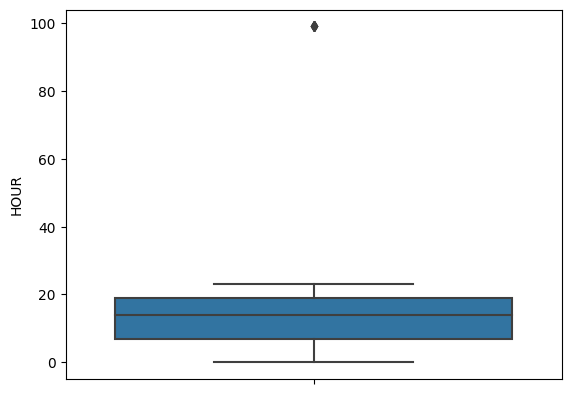

In [ ]:
sns.boxplot(y=df['HOUR'])

**This boxplot graph shows about a specific period time that mostly happening the number of accident case which ranges from afternoon to night. I have also recognized the outliers do not matter as just a little amount of data showing the outlier, so the data is good to go.**

### Data Exploration & Visualization <a class="anchor" id="Exploredata"></a>




### Distributions  <a class="anchor" id="Distributions"></a>

In [ ]:

lat_lon_pairs = list(zip(list(df.LATITUDE), list(df.LONGITUD)))
map = folium.Map(location=[lat_lon_pairs[0][0], lat_lon_pairs[0][1]])
df_angle = df[df['MAN_COLL'] >= 6]
df_interasct = df[df['TYP_INT'] >= 2]
lat_lon_pairs_intersec = list(zip(list(df_interasct['LATITUDE']), list(df_interasct['LONGITUD'])))
lat_lon_angle = list(zip(list(df_angle['LATITUDE']), list(df_angle['LONGITUD'])))

HeatMap(lat_lon_pairs_intersec).add_to(map)

for i in range(len(lat_lon_angle)):
    folium.CircleMarker(location=lat_lon_angle[i],radius=2).add_to(map)

map

**When looking at the map,it is easily seen that Georgia has the most distribution in Georgia where already happened the most accident cases when comparing to other 3 states. Overall, the accident cases was distributed as the same as density in 4 states. That means the number of car accident usually happened in this region in 2019.**

In [ ]:
states_by_accident = df_region['STATENAME'].value_counts()
states_by_accident

Georgia        1378
Alabama         856
Mississippi     580
Name: STATENAME, dtype: int64

<Axes: >

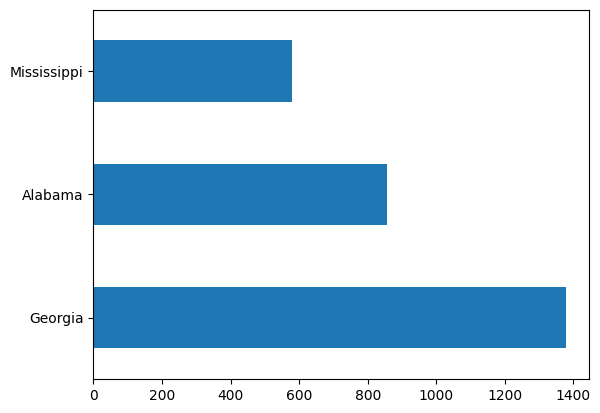

In [ ]:
states_by_accident.plot(kind='barh')

In [ ]:
cities_by_accident = df_region['COUNTYNAME'].value_counts()
cities_by_accident

FULTON (121)       136
JEFFERSON (73)      80
DEKALB (89)         77
MOBILE (97)         76
COBB (67)           64
                  ... 
TREUTLEN (283)       1
CHARLTON (49)        1
BERRIEN (19)         1
CALHOUN (37)         1
WILKINSON (157)      1
Name: COUNTYNAME, Length: 299, dtype: int64

**Here's the finding of the counties in 4 states which have the most accident cases in 4 states including Fulton, Jefferson, Dekalb, and Mobile are the top 4 places have the highest number of cases but they are in the same state Georgia, as we knew in the map distribution said that Georgia also shows the most dense of car accident.**

<Axes: >

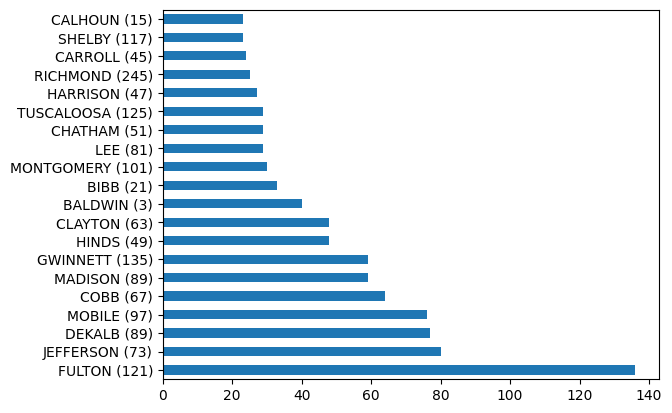

In [ ]:
cities_by_accident[:20].plot(kind='barh')


**This is the bar chart shows clearly the top counties has the high number of accident case in Tennesse, Mississippi, Alabama, and Georgia.**

In [ ]:
cities_by_accident[cities_by_accident == 1].value_counts()

1    24
Name: COUNTYNAME, dtype: int64

**There are 24 cities that have repoted just one accident (need to investigate)**

In [ ]:
high_accident_cities = cities_by_accident[cities_by_accident >= 100]
low_accident_cities = cities_by_accident[cities_by_accident < 100]

In [ ]:
len(high_accident_cities) / len('COUNTYNAME')

0.1

**Less than 10% of cities have more than 100 car accidents**

# **Visualizations**

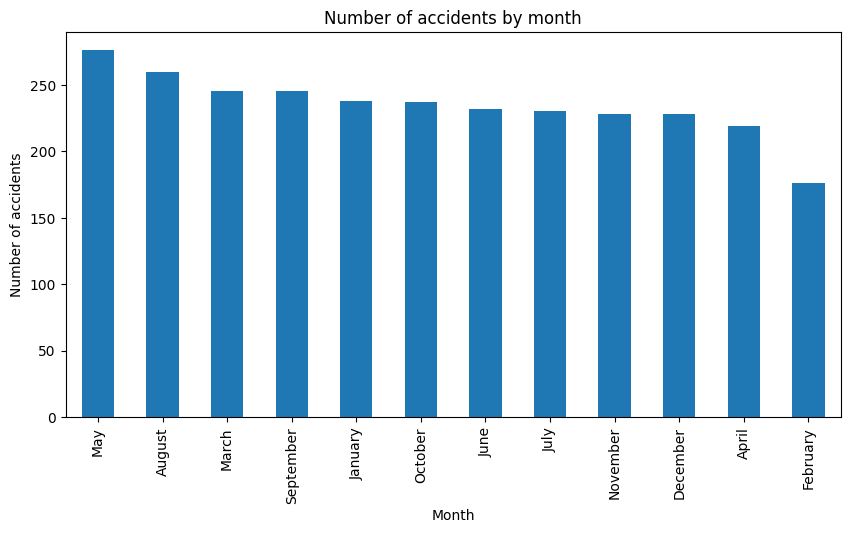

In [ ]:
df['MONTHNAME'].value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of accidents by month")
plt.ylabel('Number of accidents')
plt.xlabel('Month');

**The bar chart tells about the number of accidents by month, it is seen that May and August was highlighted. These two months in the summer may be a time for traveling.**

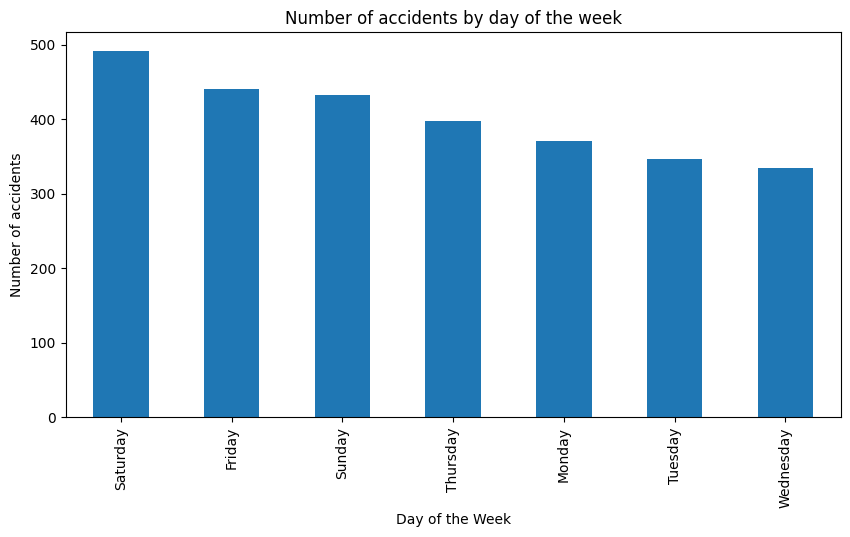

In [ ]:
df['DAY_WEEKNAME'].value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of accidents by day of the week")
plt.ylabel('Number of accidents')
plt.xlabel('Day of the Week');

**We can obviously see Saturday and Friday are the highest accidents occur in weekday. Easily to understand these 2 weekend day is a spare time for people to relax, party, and travel after the work.**

In [ ]:
df.HOUR

0        12
1        18
2        19
3         3
4         5
         ..
17766     4
17767    11
17768     3
17769    15
17770    13
Name: HOUR, Length: 2814, dtype: int64

In [ ]:
df.HOUR = pd.to_datetime(df.HOUR)

<ipython-input-26-91f706268797>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['HOUR'],color="#0398fc", ax=ax)


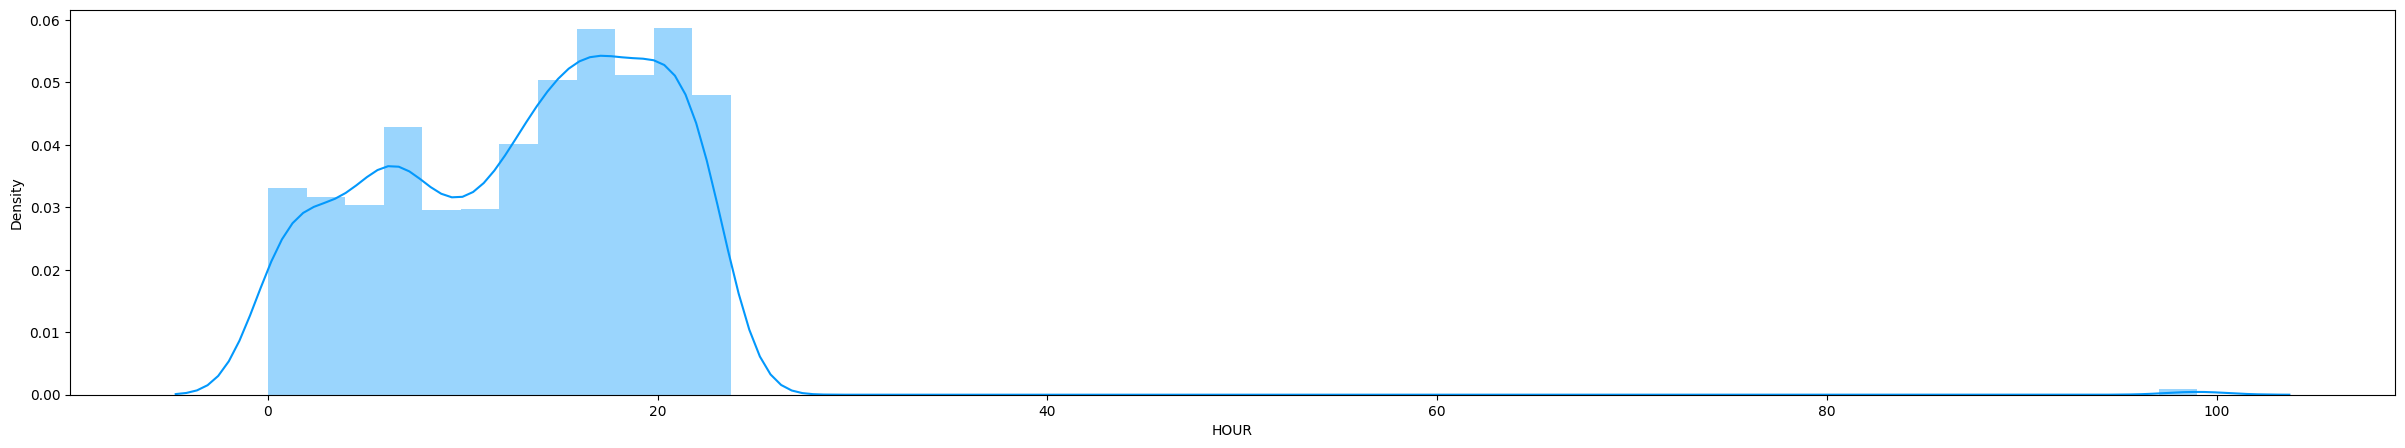

In [ ]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.distplot(df['HOUR'],color="#0398fc", ax=ax)
plt.show()

 **A high percentage of accidents occur between 6 am to 8 am (probably people in a hurry to get to work).
Next higest percentage is 5 pm to 10 pm.**

**The number of accident mostly occurred in highway**

<Axes: ylabel='count'>

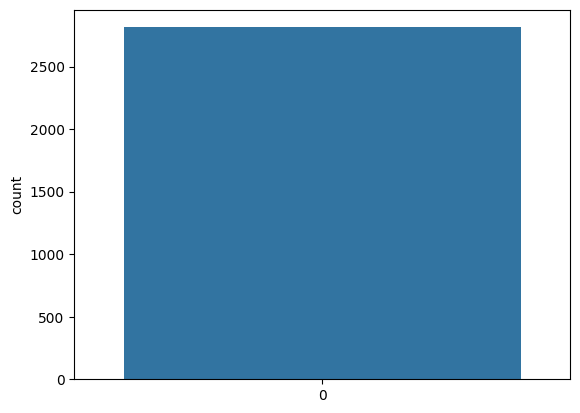

In [ ]:
sns.countplot(df['DRUNK_DR'])

**I tried to figure out the causes by accident. One of the first factors I want to expose is DRUNK but this bar chart was surprising as it shows the number of 0 people got drunk when driving is highest.**

**Next factor is to consider about WEATHER, however, it doesn't matter because there are no more accidents in raining or cloudy day.**

**Both urban and rural areas has the same likelihood in the car accident cases.**

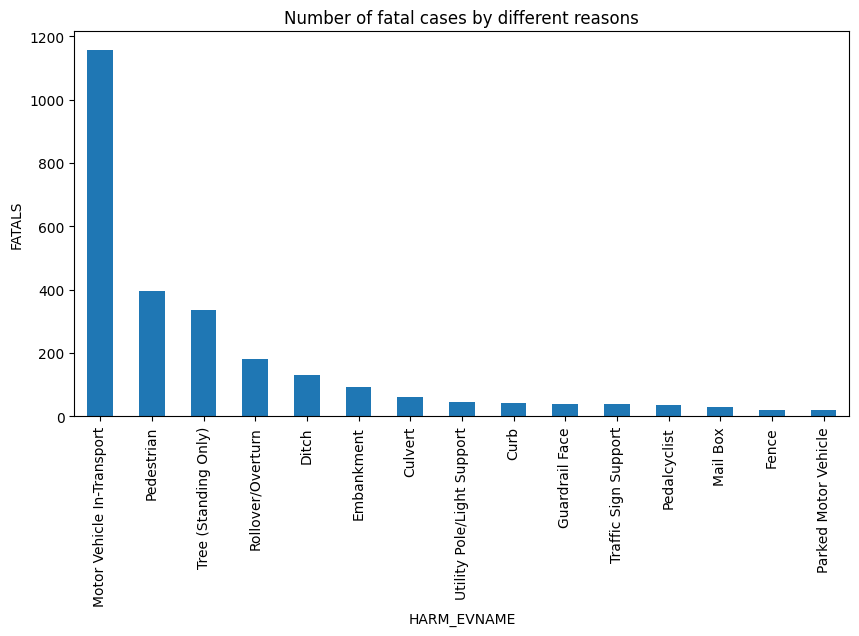

In [ ]:
df.HARM_EVNAME.value_counts().nlargest(15).plot(kind='bar', figsize=(10,5))
plt.title("Number of fatal cases by different reasons")
plt.ylabel('FATALS')
plt.xlabel('HARM_EVNAME');

**As the same with my first assumptions, the causes of fatality is the fact that people use motor vehicle has the highest number of accidents rather other reasons such as pedestrian, ditch, ect.**

###  Correlations  <a class="anchor" id="Correlations"></a>


In [ ]:
#Finding missing colunm to fulfill the dataset
missing_columns = []
sample_df = df
for i in range(len(sample_df.dtypes)): 
  if sample_df.dtypes[i] != "int64":
    missing_columns.append(sample_df.columns[i])

sample_df = df.drop(columns = list(missing_columns))

In [ ]:
for col in sample_df: 
  if len(sample_df[col].unique()) <= 1: 
    missing_columns.append(col)

In [ ]:
missing_columns.append("ST_CASE")
missing_columns.append("STATE")
missing_columns.append("YEAR")

df_processed = df.drop(columns = list(missing_columns))

In [ ]:
numerics = ['int16', 'int32', 'int64']
dfnums=df_processed.select_dtypes(include=numerics)
dfnums.corr()

,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERSONS,PERMVIT,PERNOTMVIT,COUNTY,CITY,DAY,...,NOT_MIN,ARR_HOUR,ARR_MIN,HOSP_HR,HOSP_MN,CF1,CF2,CF3,FATALS,DRUNK_DR
VE_TOTAL,1.000000,0.960657,0.242471,-0.188522,0.640290,0.636906,-0.172719,0.020983,0.027887,-0.027379,...,-0.064170,-0.065857,-0.064793,-0.157396,-0.134711,0.176528,0.062348,-0.001527,0.141468,-0.034799
VE_FORMS,0.960657,1.000000,-0.036517,-0.212851,0.664601,0.666131,-0.215823,0.026249,0.022540,-0.026132,...,-0.060077,-0.058570,-0.056997,-0.161315,-0.138054,0.144450,0.042055,-0.000570,0.146229,-0.035763
PVH_INVL,0.242471,-0.036517,1.000000,0.065182,-0.017662,-0.035181,0.132425,-0.016190,0.021607,-0.007232,...,-0.021036,-0.032372,-0.034038,-0.002842,-0.002474,0.130595,0.077437,-0.003503,-0.001768,-0.000285
PEDS,-0.188522,-0.212851,0.065182,1.000000,-0.197234,-0.197882,0.982235,-0.026685,0.097768,0.006270,...,0.044754,0.069265,0.055665,0.044531,0.031843,0.102533,0.058729,-0.007312,-0.079285,-0.166157
PERSONS,0.640290,0.664601,-0.017662,-0.197234,1.000000,0.998849,-0.190745,0.015188,-0.001073,-0.026390,...,-0.026971,-0.027918,-0.032205,-0.132712,-0.113640,0.091037,0.012666,-0.002860,0.348894,-0.031316
PERMVIT,0.636906,0.666131,-0.035181,-0.197882,0.998849,1.000000,-0.200382,0.016784,-0.001652,-0.025762,...,-0.027663,-0.028185,-0.032282,-0.132518,-0.113483,0.090519,0.012866,-0.002764,0.348898,-0.031227
PERNOTMVIT,-0.172719,-0.215823,0.132425,0.982235,-0.190745,-0.200382,1.000000,-0.032411,0.098013,0.003738,...,0.046591,0.068931,0.054879,0.043127,0.030806,0.102247,0.056706,-0.007529,-0.078390,-0.163000
COUNTY,0.020983,0.026249,-0.016190,-0.026685,0.015188,0.016784,-0.032411,1.000000,-0.004120,0.005152,...,-0.091599,-0.085996,-0.061125,-0.134152,-0.138964,-0.014468,-0.031490,-0.030600,-0.033897,-0.039947
CITY,0.027887,0.022540,0.021607,0.097768,-0.001073,-0.001652,0.098013,-0.004120,1.000000,-0.031173,...,-0.062082,-0.078783,-0.063383,-0.069487,-0.063729,-0.040948,-0.018237,-0.013999,-0.015526,-0.027902
DAY,-0.027379,-0.026132,-0.007232,0.006270,-0.026390,-0.025762,0.003738,0.005152,-0.031173,1.000000,...,0.001458,0.002307,0.017936,-0.003204,-0.005136,0.022152,0.032836,0.030985,-0.033486,0.000374


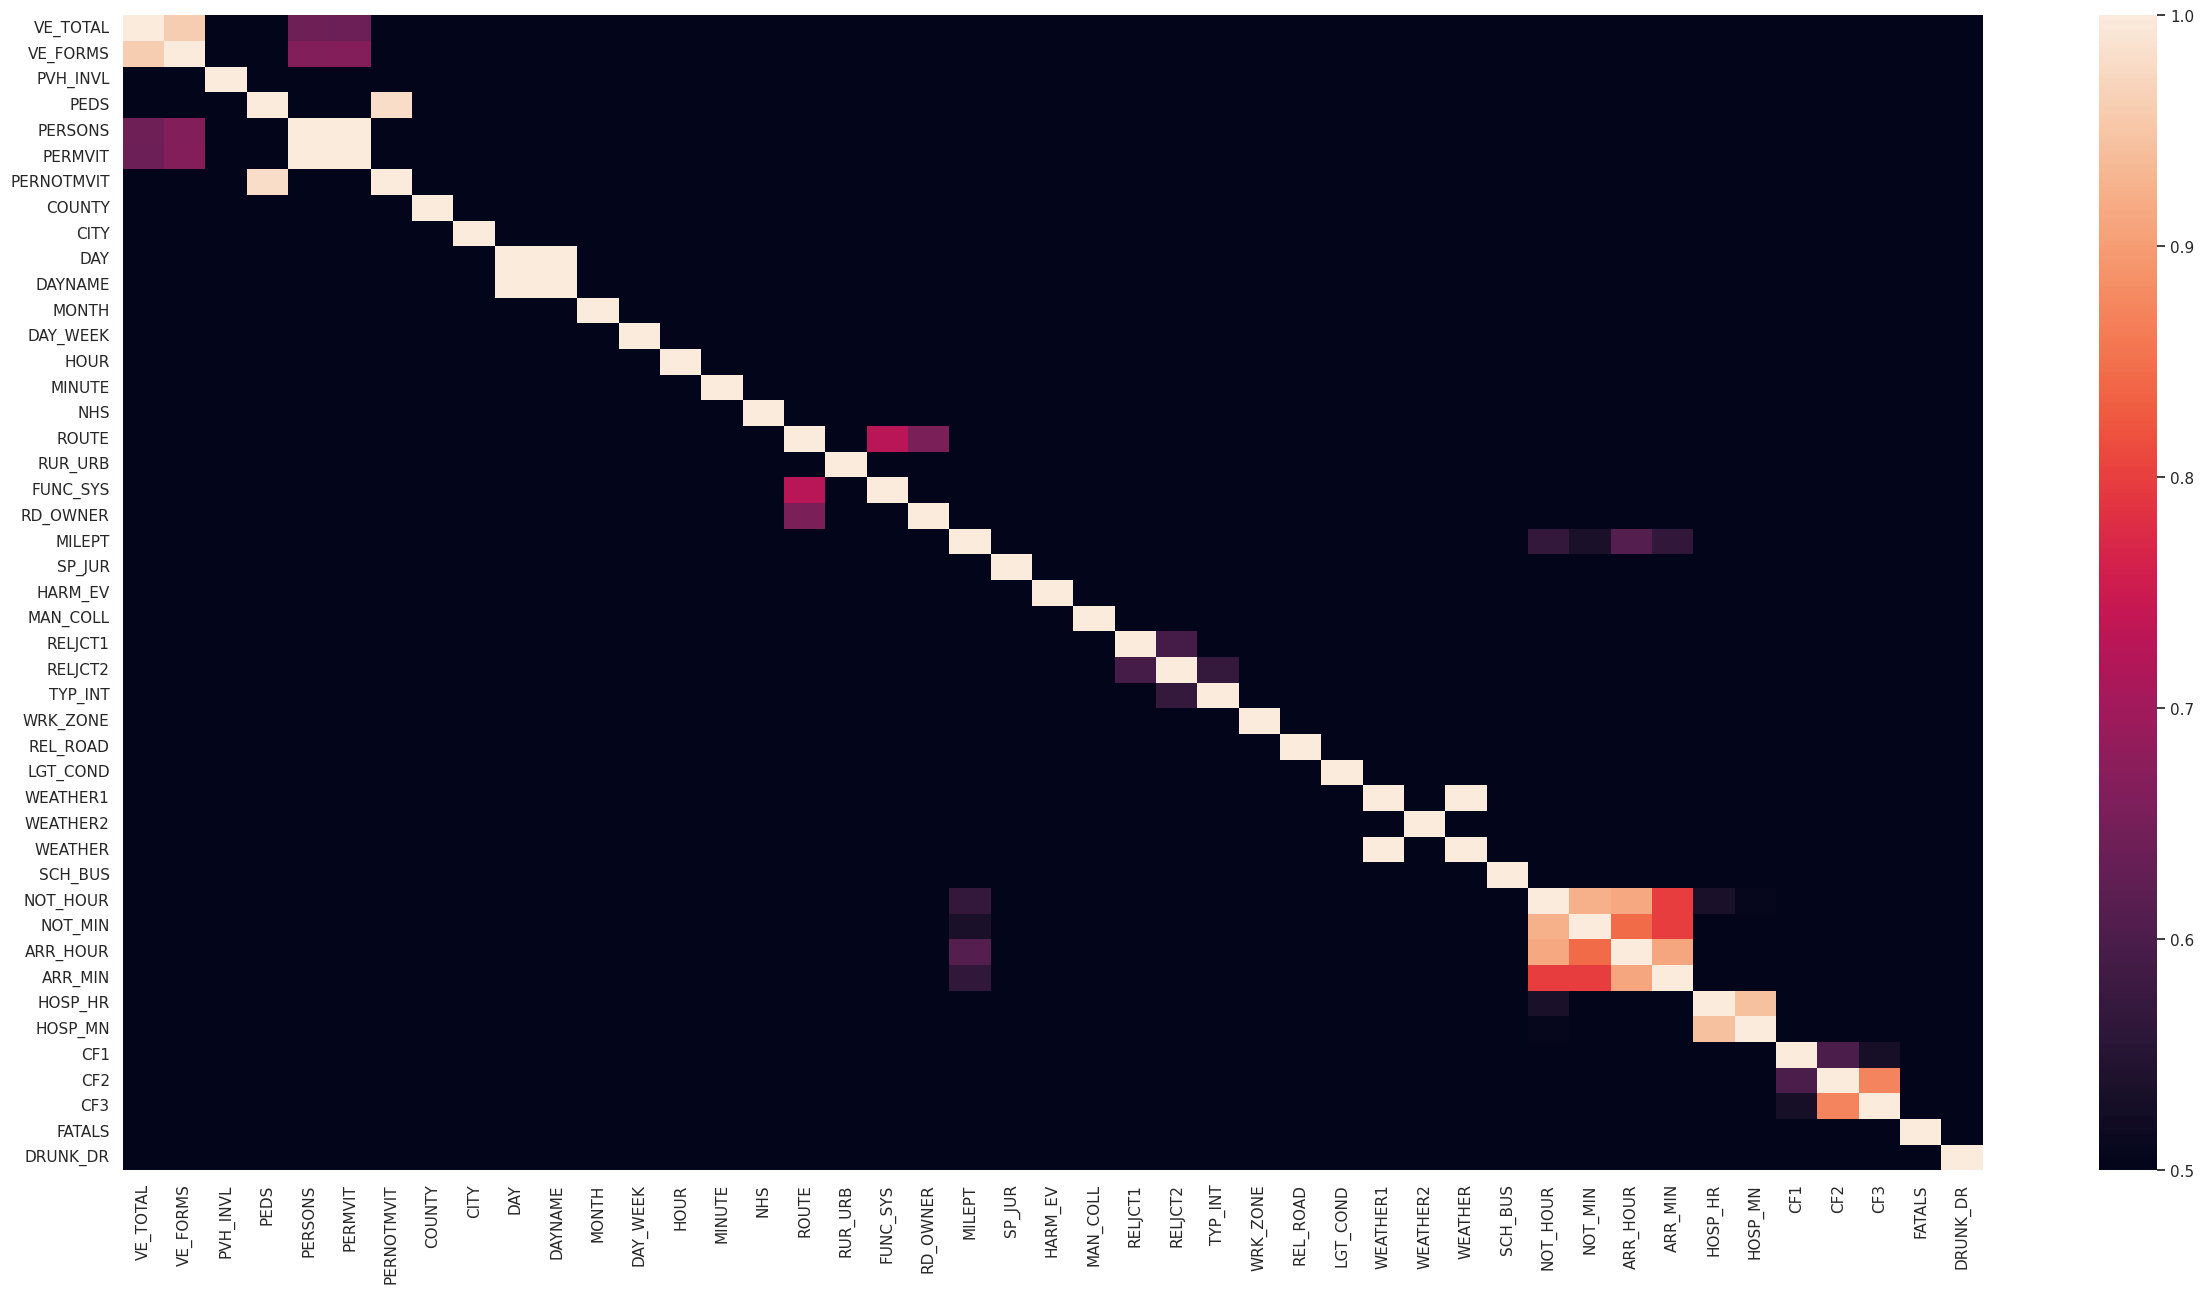

In [ ]:
sns.set (rc = {'figure.figsize':(30, 15)})
sns.heatmap(dfnums.corr(),vmin=.5)
plt.show()

##  Build Model <a class="anchor" id="BuildModel"></a>


Modeling focused on Fatalities model by:  PERSONS, Urban/Rural, TYPE/INTER



In [ ]:
Y=df_region['FATALS'].copy()
Y

0        1
1        1
2        1
3        1
4        1
        ..
17766    1
17767    1
17768    1
17769    1
17770    1
Name: FATALS, Length: 2814, dtype: int64

In [ ]:
X=df_region[['RUR_URB','TYP_INT','PERSONS']].copy()
X

,RUR_URB,TYP_INT,PERSONS
0,2,1,3
1,2,1,2
2,1,1,4
3,1,1,1
4,2,1,1
...,...,...,...
17766,2,1,1
17767,1,1,2
17768,2,1,1
17769,1,1,1


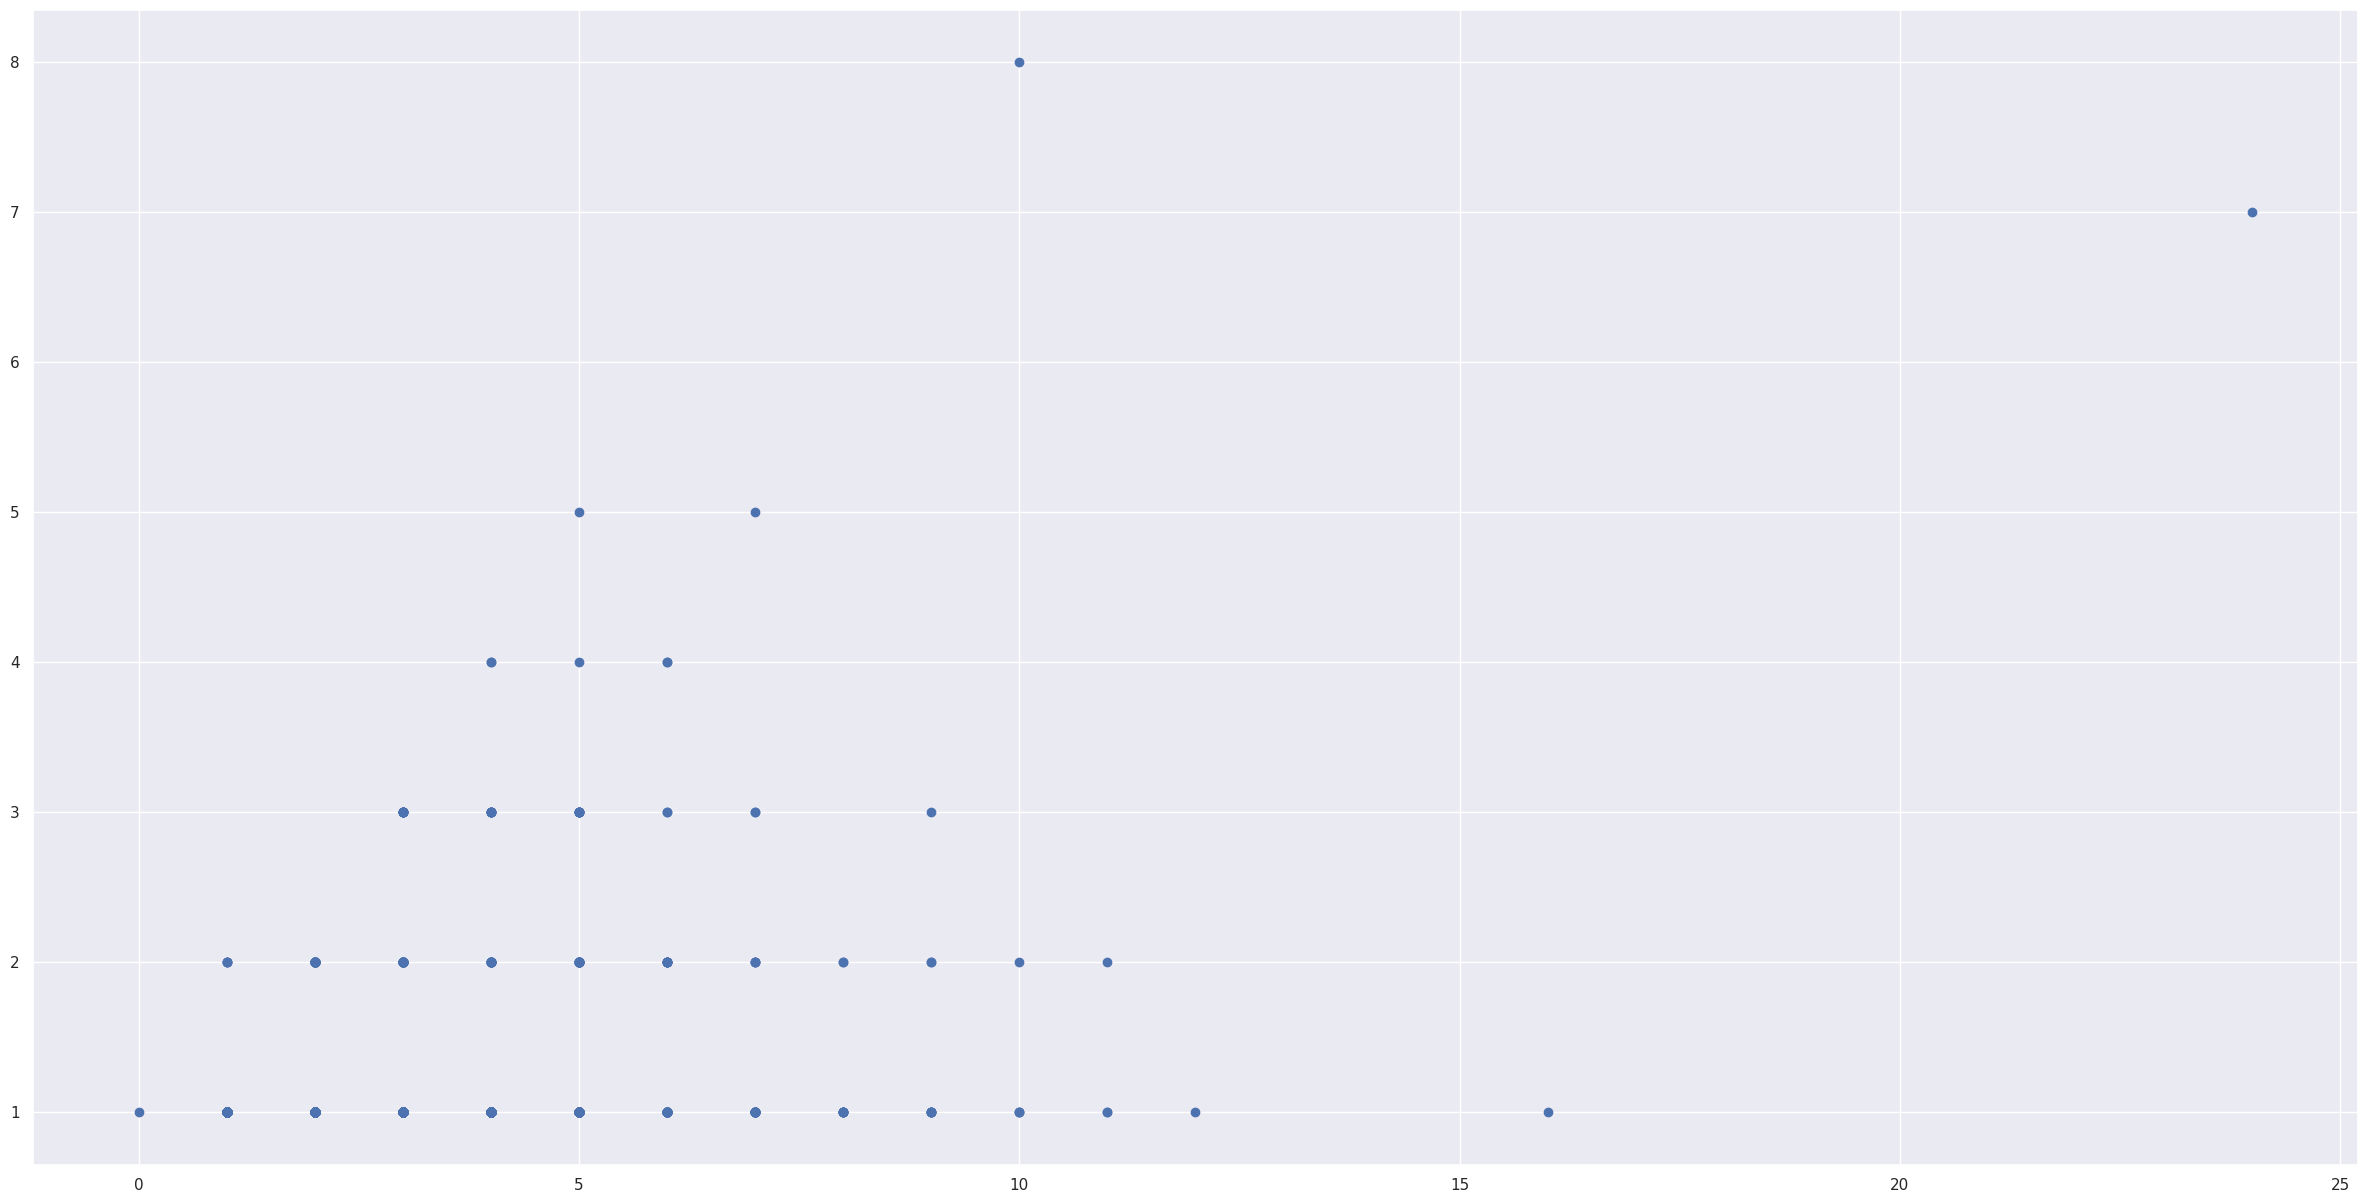

In [ ]:
plt.scatter(X['PERSONS'],Y)

This scatterplot shows the correlation between people involved in an accident and the fatalities that occurred. The data seems to be fairly evenly distributed 

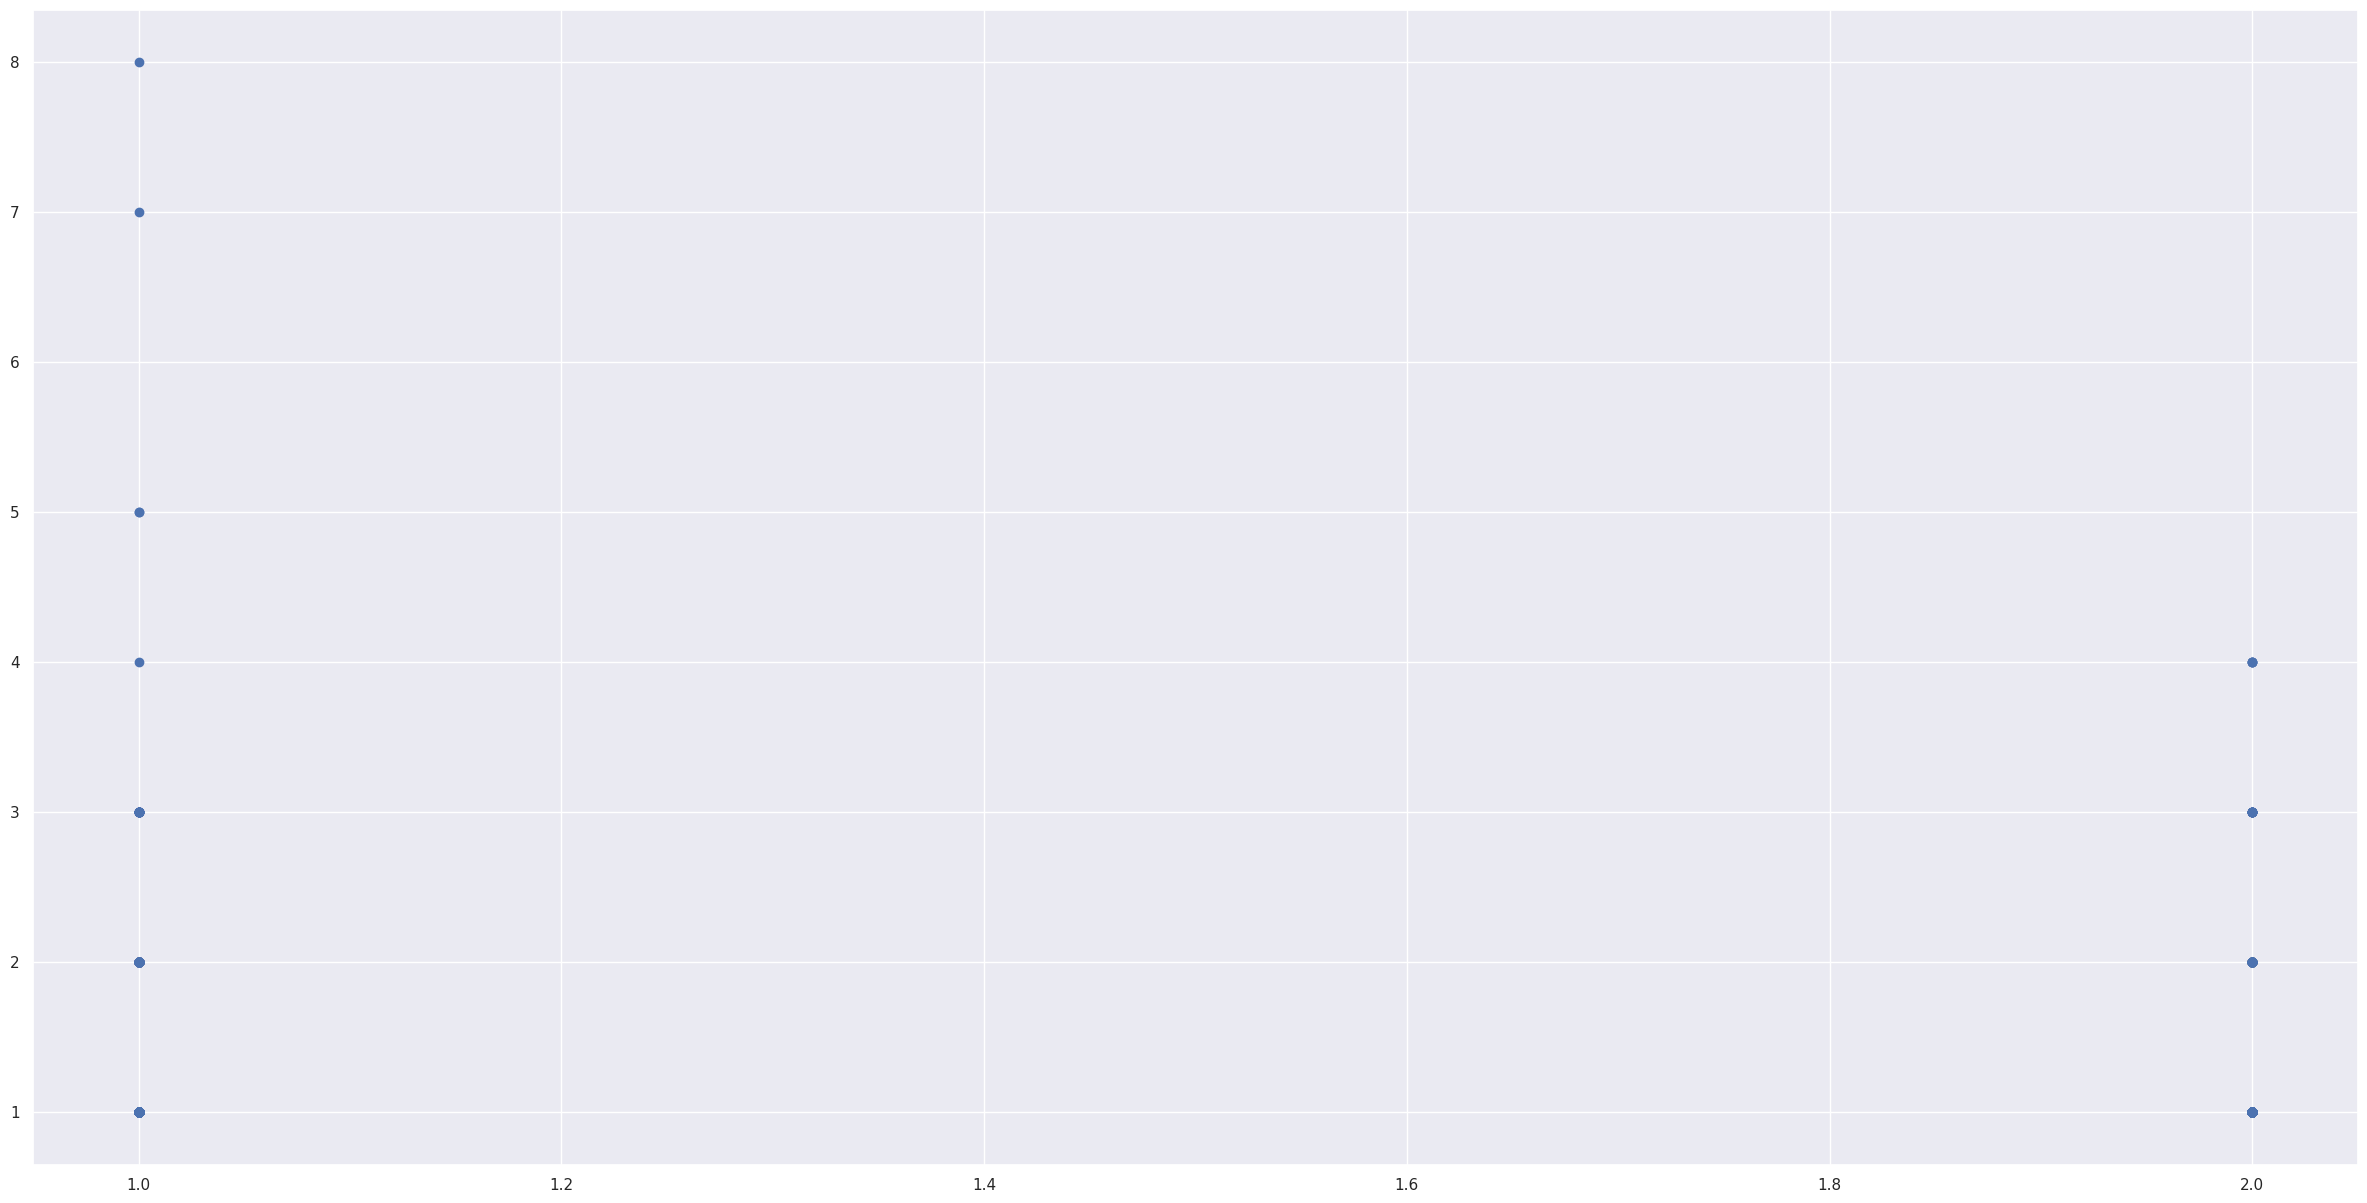

In [ ]:
plt.scatter(X['RUR_URB'],Y)

This scatterplot should the correlation between urban and rural accidents in which fatalities also occured. 

In [ ]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.16, random_state=1)

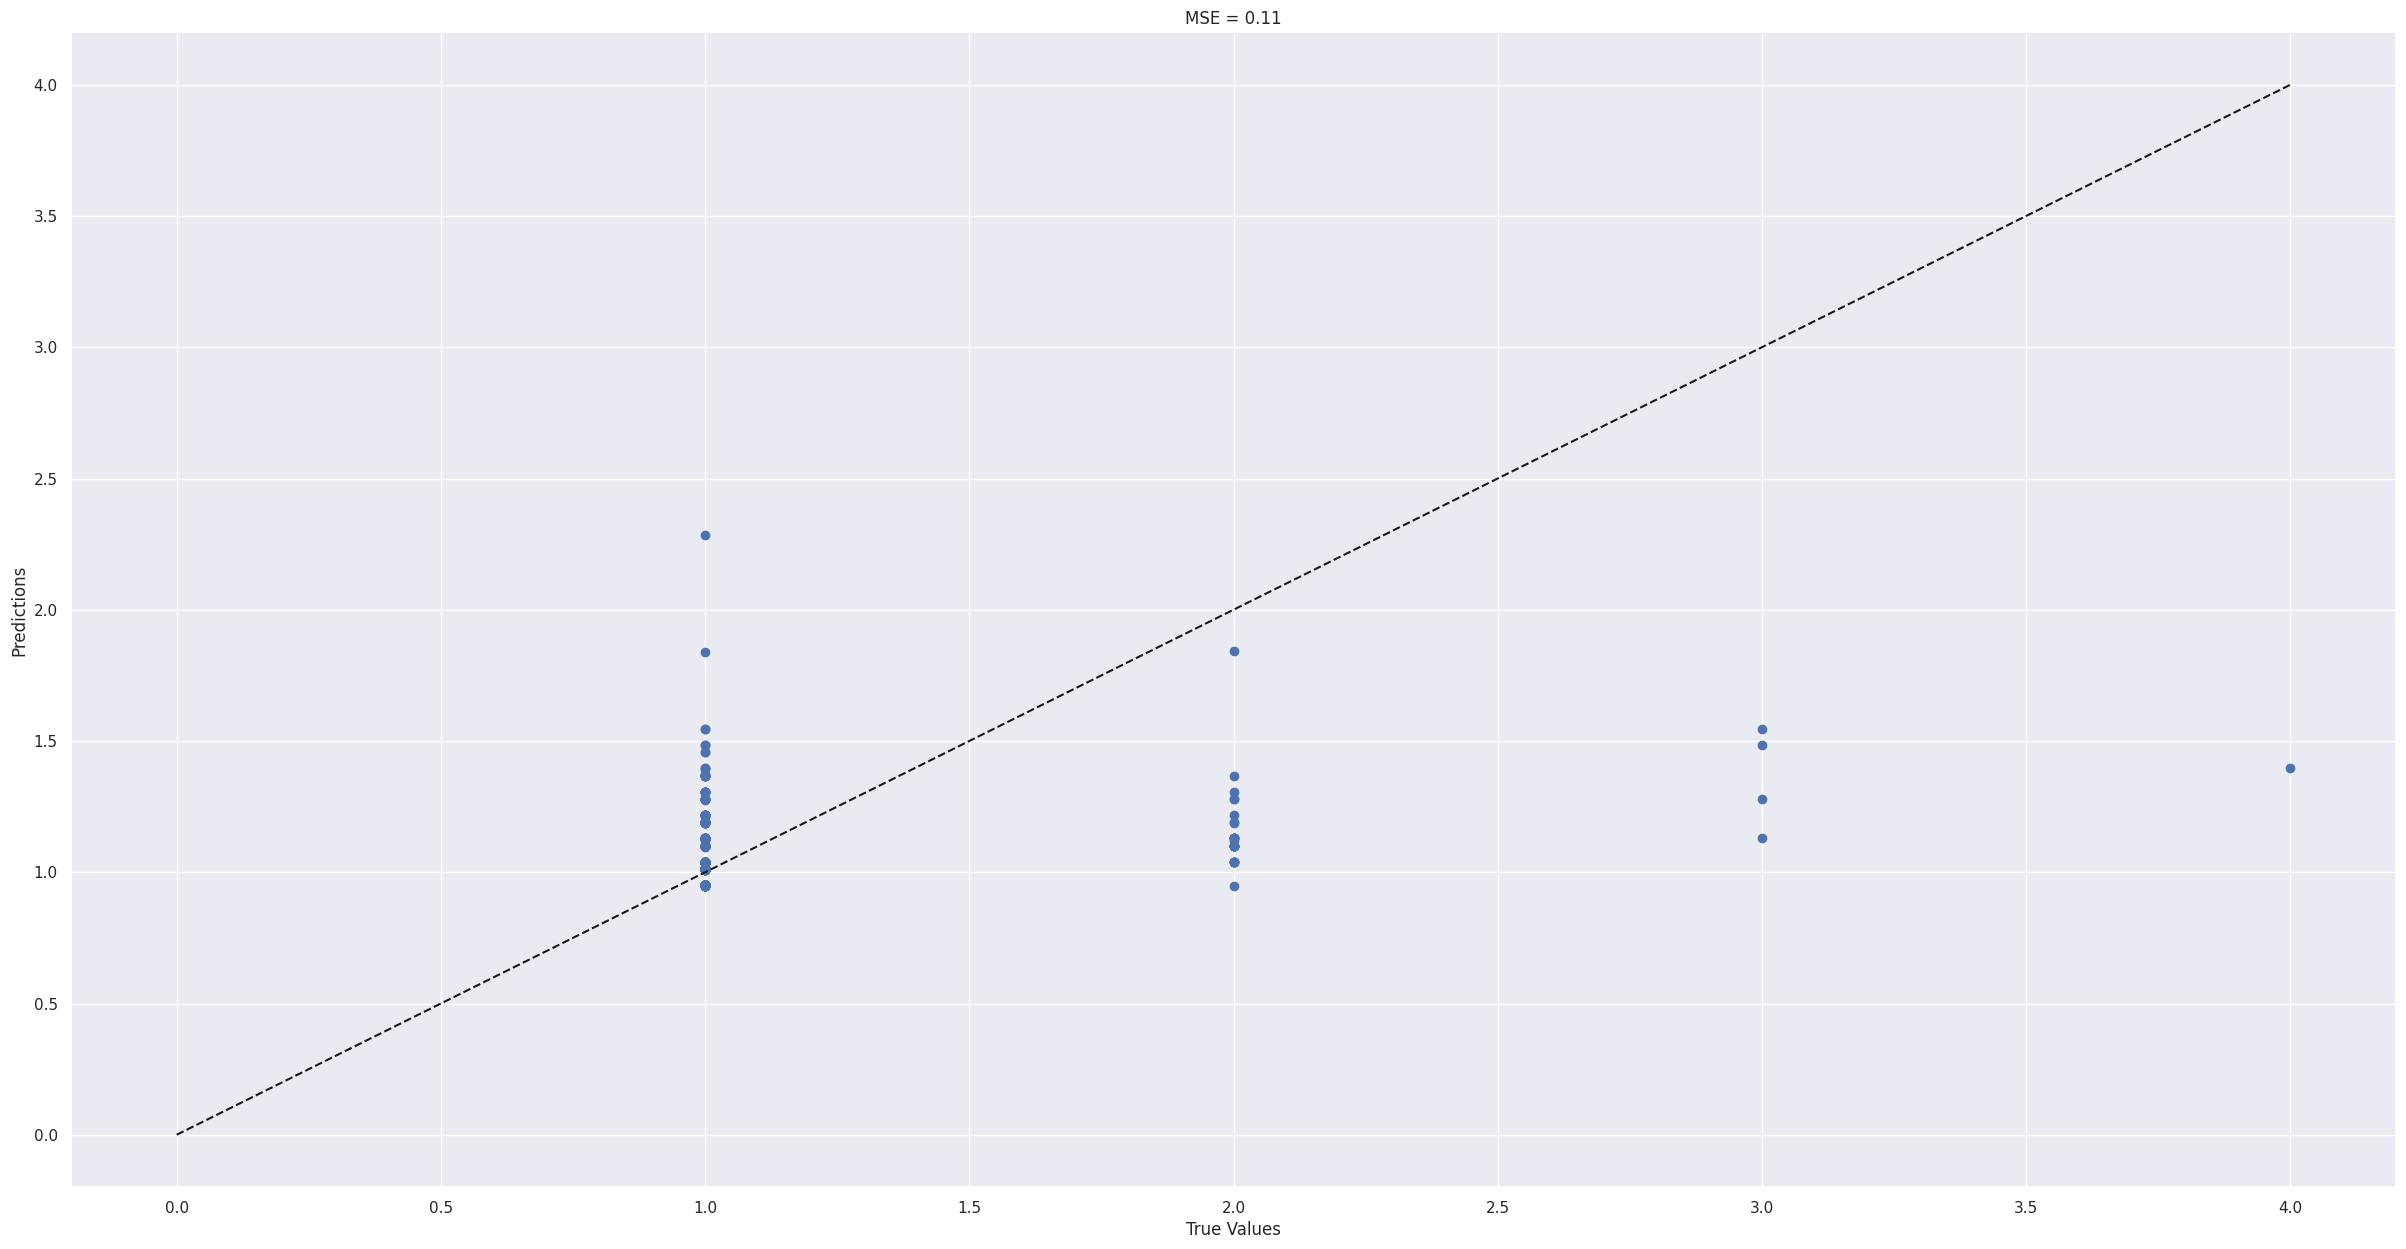

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)


import matplotlib.pyplot as plt

# Calculate the mean squared error (MSE) of the model
mse = mean_squared_error(Y_test, Y_pred)

# Plot the predicted values against the true values using a scatter plot
plt.scatter(Y_test, Y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')

# Plot a line with a slope of 1 to show the ideal prediction line
plt.plot([0, max(Y_test)], [0, max(Y_test)], 'k--')

# Add the MSE to the plot as the title
plt.title('MSE = {:.2f}'.format(mse))
plt.show()
plt.show()






Text(0, 0.5, 'Accuracy')

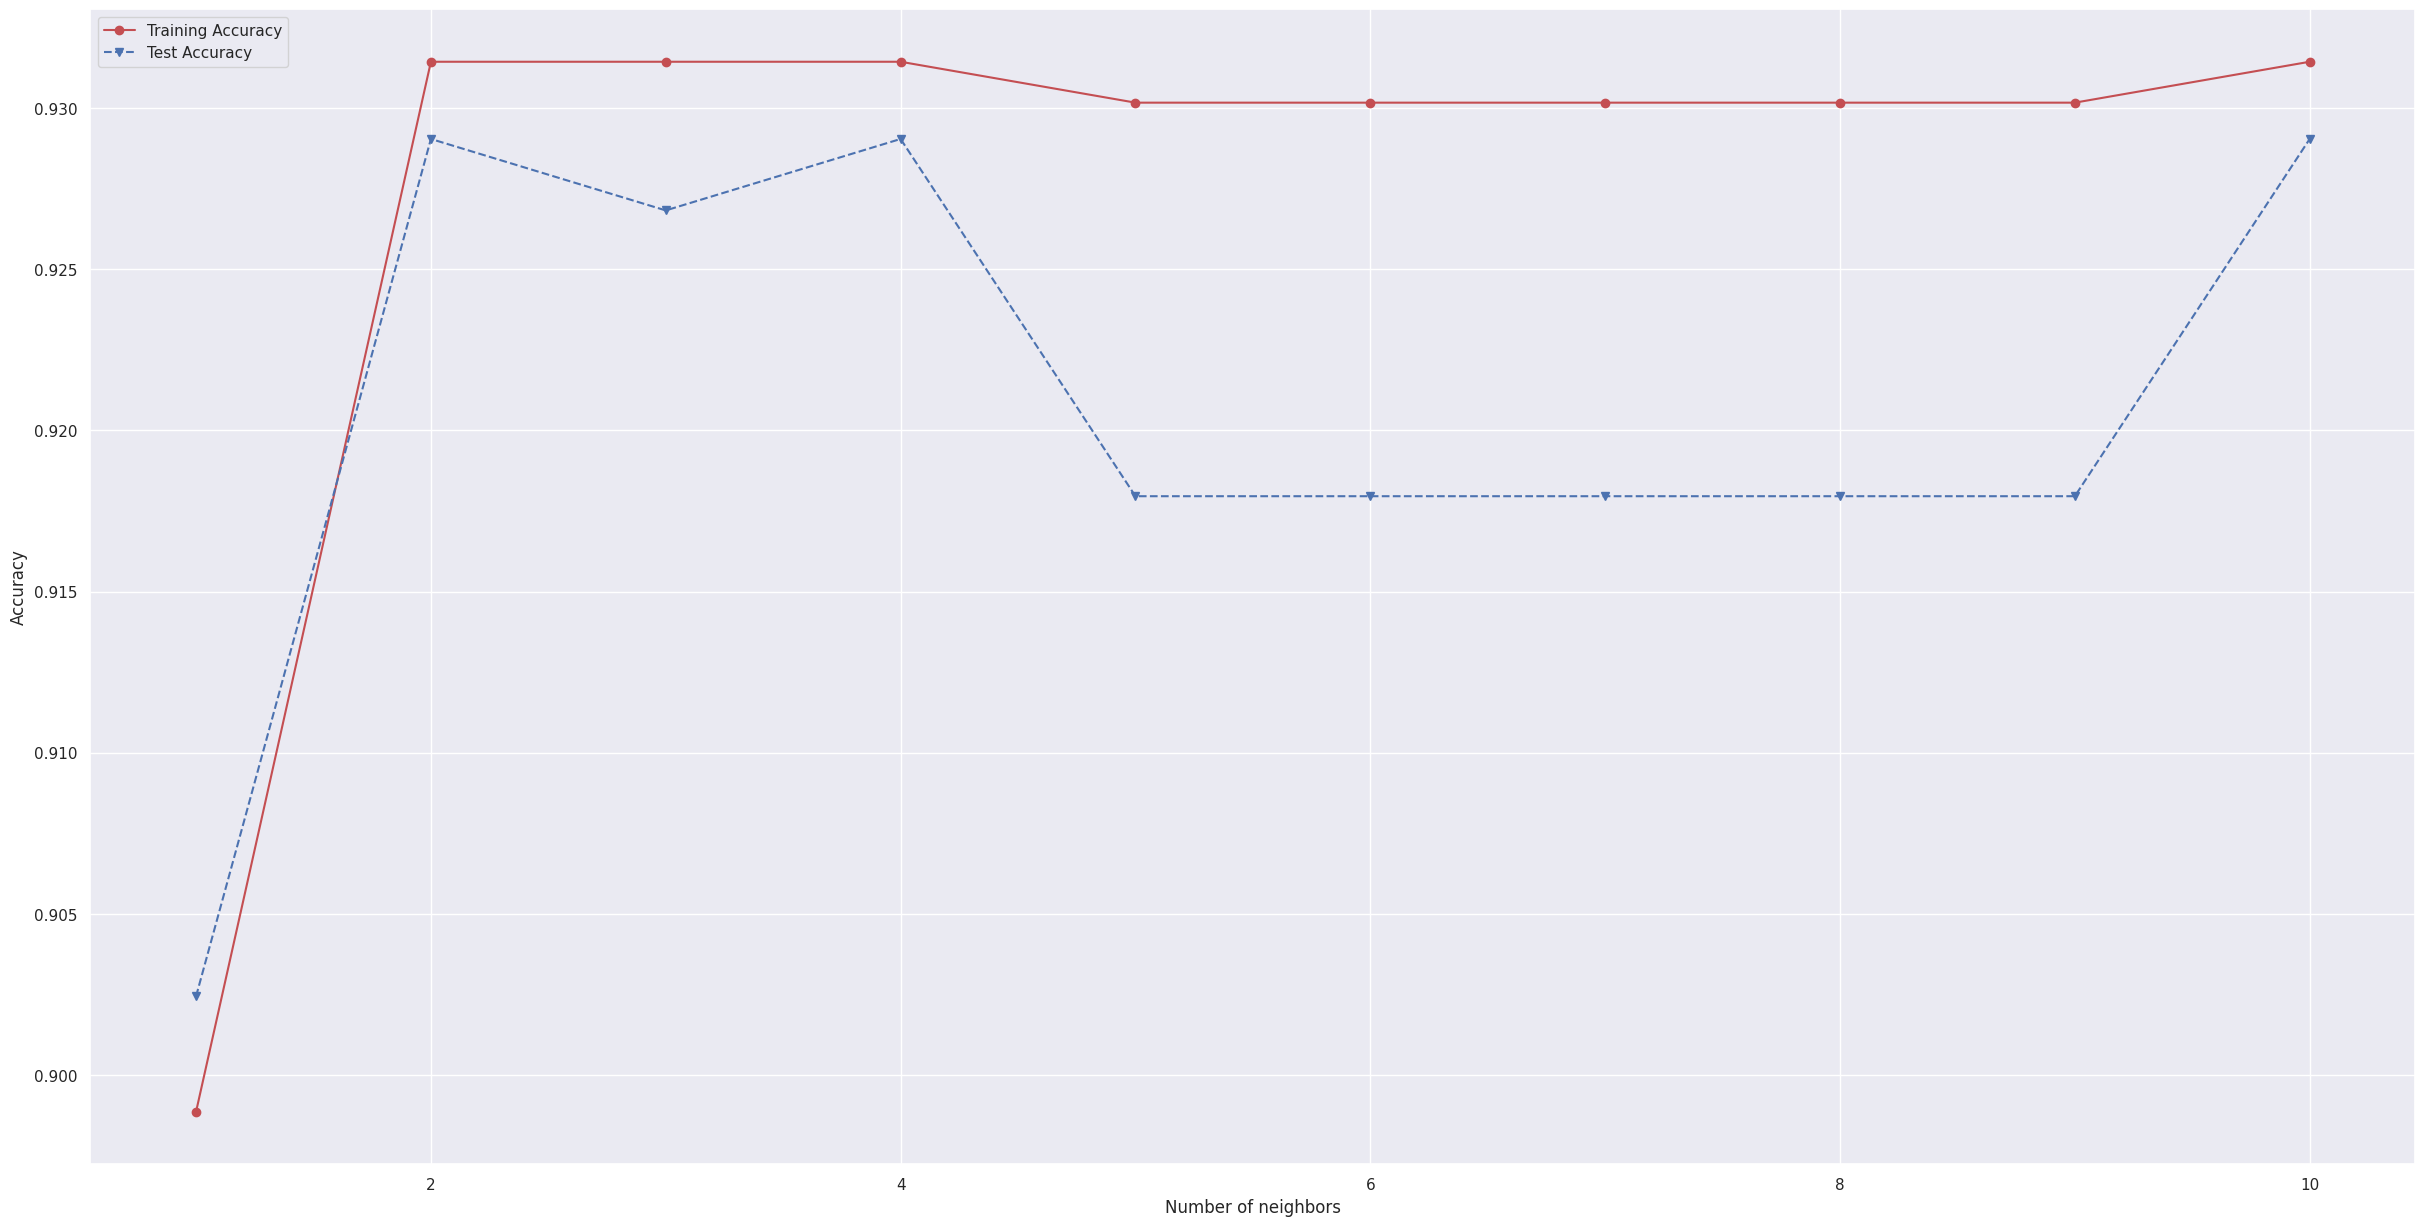

In [ ]:


numNeighbors = [1,2,3,4,5,6,7,8,9,10]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc.append(accuracy_score(Y_train, Y_predTrain))
    testAcc.append(accuracy_score(Y_test, Y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

I compared the type of intersection, the amount of people involved in an accident, and then whether the accident happened in an urban or rural area with the number of fatalities that occured during an accident. The graph came out unreliable as the test and training accuracies crossed which shows underfitting within the data. The graph is also overfit between 5 and 9 neighbors before leveling out at 9 neighbors. 


This would be an example of a more reliable k nearest neighbors graph. For this, I compared people involved in an accident with whether the accident occured in a rural vs. urban area and the light conditions involved in the accident. The accuracy stays constent after 6 neighbors. 



## Resources and References
*What resources and references have you used for this project?*
📝
 https://www.nhtsa.gov/traffic-records/state-data-information-resources
https://stackoverflow.com/questions/56686420/kotlin-kclass-from-ktype
https://docs.w3cub.com/kotlin/api/latest/jvm/stdlib/kotlin.reflect/-k-classifier
https://doc.arcgis.com/en/arcgis-solutions/11.0/reference/introduction-to-traffic-crash-analysis.htm#:~:text=Traffic%20Crash%20Analysis%20can%20be,serious%20and%20fatal%20crashes%20occur.

In [1]:
# ⚠️ Make sure you run this cell at the end of your notebook before every submission!
!jupyter nbconvert --to python source.ipynb

[NbConvertApp] WARNING | pattern 'source.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Exec